<a href="https://colab.research.google.com/github/aaaana/Anna_CS483_AI_hmwork/blob/main/homework_2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

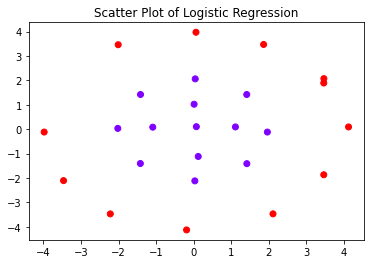

In [1]:
"""Homework#2 Question 3
Given the following dataset, design python function as binary classifier for the 
following two classes. 
	- Plot all points in two different classes first in Excel or python matplotlib functions
	- Observe what boundary decision function is good to separate two classes
  - Build up hypothesis function/loss function/cost function based on your 
  selected   decision function
  - Write python program to train your model
  - After model training, plot decision boundary function in Excel or python 
  matplotlib functions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

data = pd.DataFrame()

data['x1']=[-3.98, -3.464,3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,
    0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
data['x2']=[-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,
    2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
data['y']=[1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]


# Create a scatter plot
plt.scatter(data.x1, data.x2, c=data.y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()
#sns.pairplot(data, hue='y')


In [2]:
from sklearn.model_selection import train_test_split
# 80% train
train, test= train_test_split(data.values, test_size=0.2)

In [3]:
from math import exp

def predict(row, theta):
  x = row [0:2]
  #hypothesis function
  yhat = theta[0] + theta[1]*(x[0]**2) + theta[2]*(x[1]**2)
  return 1.0 / (1.0 + exp(-yhat))

l_rate = 0.3
n_iter = 100

#loss function
loss = np.zeros(n_iter)
theta = [0.0, 0.0, 0.0]
for iter in range(n_iter):
  sum_error = 0
  for row in train:
    x = row[0:-1]
    y = row[-1] #last column in matrix
    yhat = predict(row, theta)
    error = y-yhat
    sum_error += error*2
    theta[0] += l_rate*error*yhat*(1-yhat)
    theta[1] += l_rate*error*yhat*(1-yhat)*(x[0]**2)
    theta[2] += l_rate*error*yhat*(1-yhat)*(x[1]**2)
  loss[iter] = sum_error
print()
print("Theta 0 = ", theta[0])
print("Theta 1 = ", theta[1])
print("Theta 2 = ", theta[2])
print()


Theta 0 =  -4.0470638646326185
Theta 1 =  0.4535990263719086
Theta 2 =  0.5046343469623124



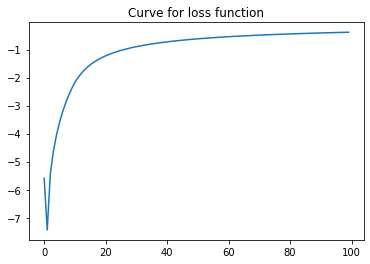

In [4]:


# #plot hypothesis function
# from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show

# def hypothesis_func(x1, x2):
#   return 1.0 / (1.0 + exp(-(theta[0] + theta[1]*(x1**2) + theta[2]*(x2**2))))

# x1 = [-3.98, -3.464,3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,
#     0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
# x2 =[-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,
#     2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
# X1, X2 = meshgrid(x1, x2)
# Y = hypothesis_func(X1, X2)
# im = imshow(Y, cmap=cm.RdBu)

# cset = contour(Y,arange(-1,1,0.1),linewidths=2,cmap=cm.Set2)
# clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
# colorbar(im) # adding the colobar on the right
# # latex fashion title
# title('Hypothesis')
# show()

plt.plot(loss)
plt.title('Curve for loss function')
plt.show()
